<a href="https://colab.research.google.com/github/mateobivol/project-2/blob/main/project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
url= 'https://raw.githubusercontent.com/KadeF10/Spotify/main/data.csv'
df= pd.read_csv(url)
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [61]:
df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X= df[["danceability"]]
Y= df["energy"]
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5] 

array([0.69238065, 0.68784936, 0.69263239, 0.67531279, 0.68457676])

In [63]:
Z= df[["loudness", "tempo", "energy", "instrumentalness"]]
lm.fit(Z, df['danceability'])


LinearRegression()

In [64]:
lm.intercept_

0.8068071128741681

In [65]:
lm.coef_

array([ 0.00577454, -0.00094406, -0.03770312, -0.05230038])

In [66]:
import seaborn as sns
%matplotlib inline 

(0.0, 1.04716)

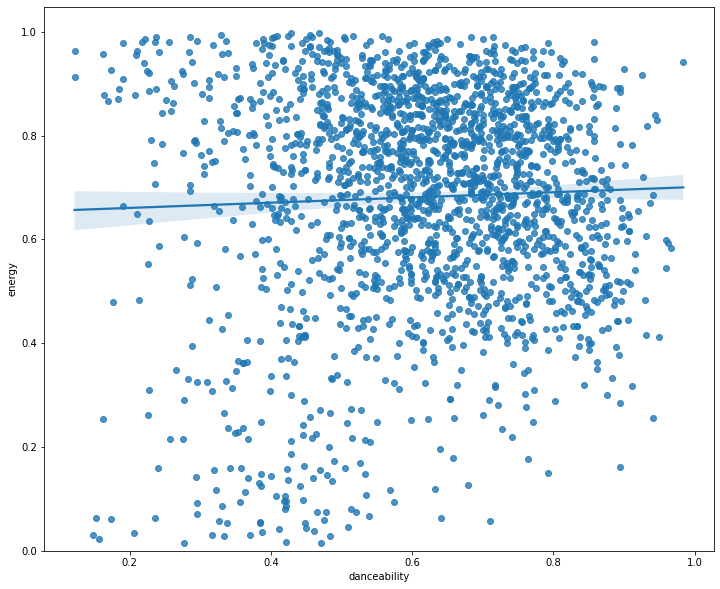

In [67]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="danceability", y="energy", data=df)
plt.ylim(0,)

(0.0, 1.0271)

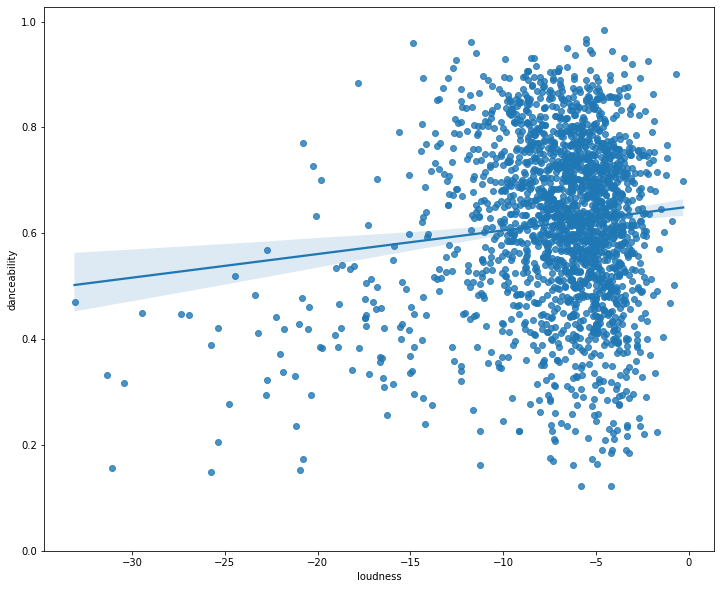

In [68]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="loudness", y="danceability", data=df)
plt.ylim(0,)

(0.0, 1.0271)

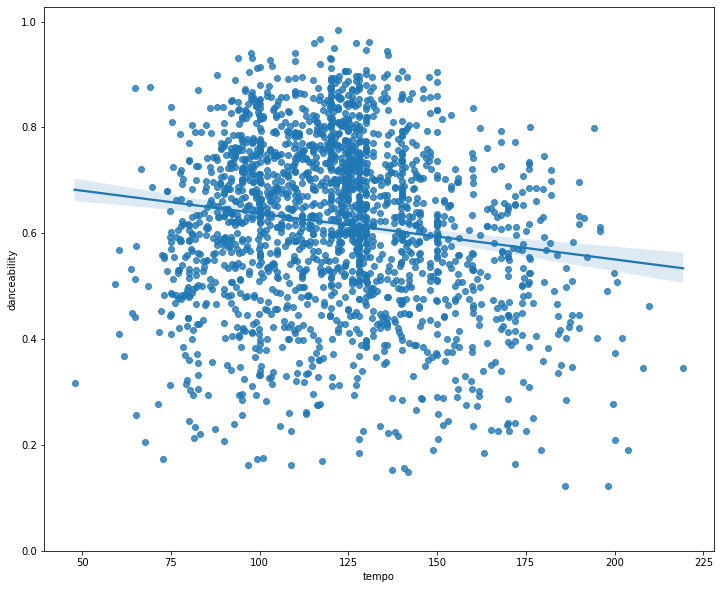

In [69]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="tempo", y="danceability", data=df)
plt.ylim(0,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


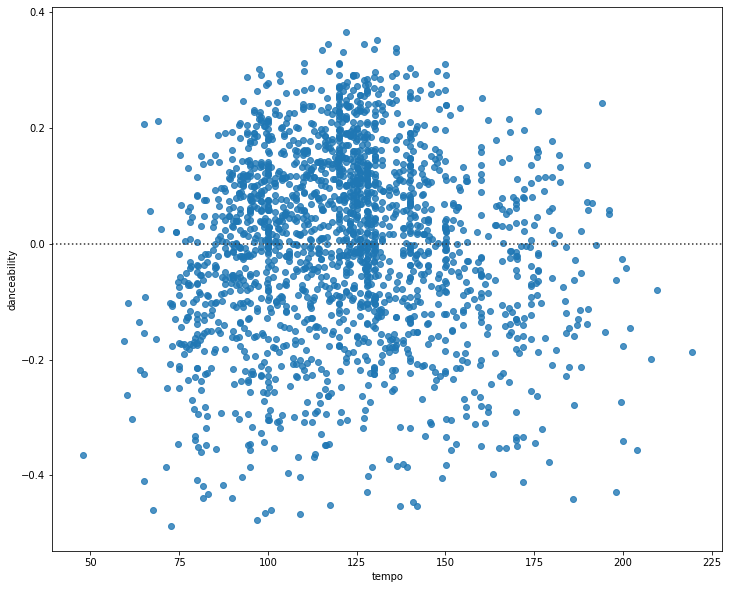

In [70]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['tempo'], df['danceability'])
#sns.regplot(df["tempo"],df["danceability"])
#plt.ylim(-10000,)
plt.show()

In [71]:
Y_hat= lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


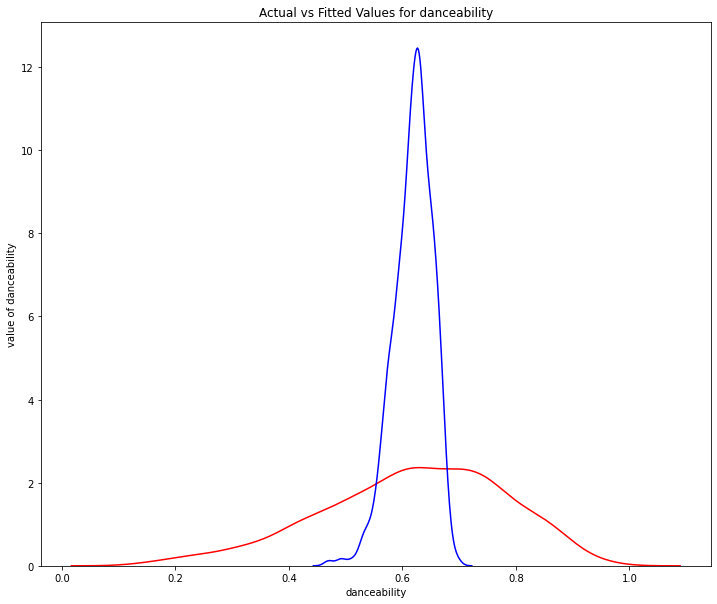

In [72]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['danceability'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for danceability')
plt.xlabel('danceability')
plt.ylabel('value of danceability')

plt.show()
plt.close()

In [73]:
lm.fit(Z, df['danceability'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['danceability']))

The R-square is:  0.04621933049595006


In [74]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- danceability
Feature names seen at fit time, yet now missing:
- energy
- instrumentalness
- loudness
- tempo

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [75]:
from sklearn.metrics import mean_squared_error

In [77]:
mse = mean_squared_error(df['danceability'], Yhat)
print('The mean square error of danceability and predicted value is: ', mse)

The mean square error of danceability and predicted value is:  0.027361984210707326


In [79]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for danceability ~ spotify')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('danceability')

    plt.show()
    plt.close()

In [80]:
x = df['tempo']
y = df['danceability']

In [81]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3            2
4.692e-07 x - 0.000229 x + 0.03367 x - 0.8962
